/tmp/ipykernel_14285/2184153298.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Prompt ID: 0
Initial prompt score: {'Please properly punctuate the given text (without omitting a single word) and output only the resulting punctuated text. Please do not omit a single word from the original text. {TEXT}': 68.38336726466045}
Optimized prompt score: {"###Instruction### Your task is to thoroughly and accurately punctuate the given text, carefully maintaining the original sentence structure and word order, without omitting a single word. You MUST provide only the resulting punctuated text as output, ensuring precision, unbiasedness, and ease of comprehension. Think step by step, breaking down the text into manageable parts, and use the same language and style as the original text. I'm offering a $100 tip for a superior solution! Ensure that your answer is natural, easy to understand, and written in a human-like manner, as if you were explaining it to a beginner. Your output should be the punctuated text only, without any additional comments or explanations. If you need c

,graph,initial_prompt,initial_train_score,initial_test_score,optimized_prompt,optimized_train_score,optimized_test_score
0,,Please properly punctuate the given text (without omitting a single word) and output only the resulting punctuated text. Please do not omit a single word from the original text. {TEXT},65.070610,68.383367,"###Instruction### Your task is to thoroughly and accurately punctuate the given text, carefully maintaining the original sentence structure and word order, without omitting a single word. You MUST provide only the resulting punctuated text as output, ensuring precision, unbiasedness, and ease of comprehension. Think step by step, breaking down the text into manageable parts, and use the same language and style as the original text. I'm offering a $100 tip for a superior solution! Ensure that your answer is natural, easy to understand, and written in a human-like manner, as if you were explaining it to a beginner. Your output should be the punctuated text only, without any additional comments or explanations. If you need clarification or more information, please ask me questions until you are confident in your response. Please use the same language based on the provided paragraph. Now, please properly punctuate the given text: {TEXT}. Write a detailed punctuated text in a natural, human-like manner, carefully considering the context and nuances of the original text, and ensure that your response is concise, clear, free of errors, and easy to comprehend.",78.695877,77.537912
1,,"\n\tCorrect any grammatical, spelling errors in the question below. \n\tOutput only the corrected version and nothing else\n\tQuestion: {TEXT}\n\tCorrected version: \n\t",89.228994,87.634846,"\n\tCorrect any grammatical, spelling errors in the question below. \n\tOutput only the corrected version and nothing else\n\tQuestion: {TEXT}\n\tCorrected version: \n\t",89.228994,87.735856
2,,"Objective: To enhance official documents written. \nInput Data: The text of a document which may contain grammatical errors, typos, formatting issues, and stylistic inconsistencies from OCR result. \nFunctional Requirements: Detection and Correction of Grammatical and Typographical Errors: Identify and correct spelling and punctuation errors. Check grammatical agreements within sentences.\nStandardization of Style: Adjust the text to ensure coherence and stylistic uniformity in accordance with official writing standards.\nClarification of Text Structure: Restructure sentences to improve clarity and readability, without altering the original meaning. Keep and answer the detected language from the document.\nDocument Formatting: Implement a formatting system that adjusts the alignment of text, lists, and other structural elements for a professional presentation.\nOutput Data: This is the corrected and enhanced document. Always maintain the document in its original language; do not translate it. Respond only in the language detected from the document. Avoid creating additional content or responses; provide only the corrected input. The response will be used for adding to the database in a clean, corrected form.\nThe text: {TEXT}.",16.322688,16.954665,"###Instruction###\nYour task is to expertly enhance an official document written in the detected language from the input data. You MUST meticulously correct grammatical and typographical errors, standardize the style, clarify the text structure, and implement a professional formatting system while maintaining the original language and tone. You will be penalized for incorrect responses. Ensure your output is bias-free, stereotype-free, and adheres to official writing standards.\n\n###Example###\nInput Data: A document with grammatical errors, typos, formatting issues, and stylistic inconsistencies.\n\n###Question###\nCan you thoroughly enhance the document while preserving its original meaning and tone?\n\n###Context###\nYou are an expert in document enhancement and editing.\n\n###Input Data###\nThe text: {

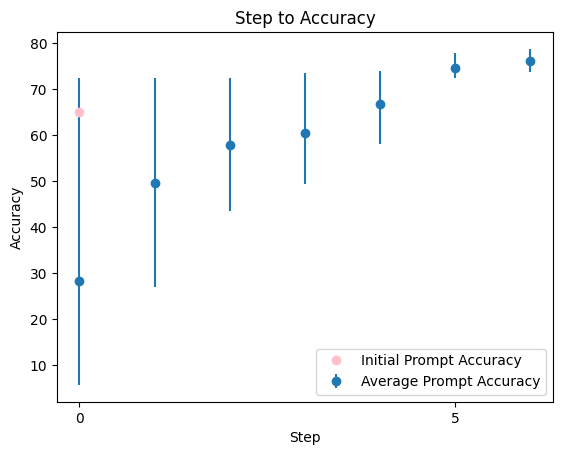

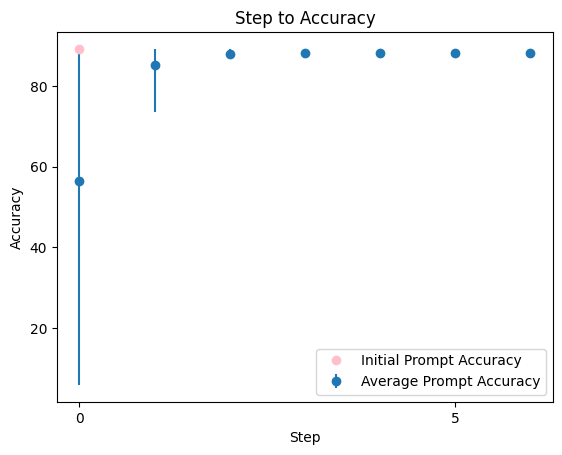

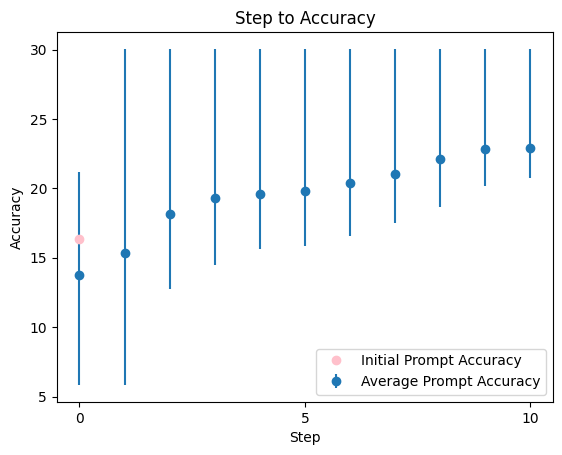

In [106]:
import statistics
import matplotlib.pyplot as plt
import json, os
import pandas as pd
from IPython.core.display import display, HTML

CACHE_FILE = "testingSetScores.json"
GRAPH_DIR_PATH = "graphs"

def make_graph(ID, initial_prompt):
    # If graph dir doesn't exist, create it
    if not os.path.exists(GRAPH_DIR_PATH):
        os.makedirs(GRAPH_DIR_PATH)

    SAVE_PATH = f"{ID}/training_results.json"
    # load opro.json
    with open(SAVE_PATH) as f:
        opro_results = json.load(f)
    
    step_to_accuracy = {
        step: (
            statistics.mean(opro_results[step].values()),
            max(opro_results[step].values()),
            min(opro_results[step].values()),
        )
        for step in opro_results
    }

    # Plot step to accuracy as a continuous line graph, including stdevs as highlighted error bars
    fig, ax = plt.subplots()
    ax.errorbar(
        step_to_accuracy.keys(),
        [accuracy[0] for accuracy in step_to_accuracy.values()],
        yerr=[
            [accuracy[0] - accuracy[2] for accuracy in step_to_accuracy.values()],  # Lower errors
            [accuracy[1] - accuracy[0] for accuracy in step_to_accuracy.values()]   # Upper errors
        ],
        fmt="o",
    )

    ax.set_xticks([step for step in step_to_accuracy.keys() if int(step) % 5 == 0])
    ax.set_xlabel("Step")
    ax.set_ylabel("Accuracy")
    ax.set_title("Step to Accuracy")

    # Add a pink point to the plot
    ax.plot(0, opro_results["0"][initial_prompt], 'o', color='pink')

    # Add legend to show pink dot is initial prompt accuracy, blue dot is avg prompt accuracy
    ax.legend(["Initial Prompt Accuracy", "Average Prompt Accuracy"], loc="lower right")


    # save the plot
    plt.savefig(f"{GRAPH_DIR_PATH}/{ID}.png")

    # return initial prompt accuracy and best prompt accuracy
    return opro_results["0"][initial_prompt], max([max(v.values()) for v in opro_results.values()])


# load cache file
with open(CACHE_FILE) as f:
    prompt_scores = json.load(f)

id_to_promptStats = {}
for p, p_score in prompt_scores.items():
    ID = p_score["ID"]
    initial_prompt_score = p_score["initial_prompt"]
    optimized_prompt_score = p_score["optimized_prompt"]
    initial_prompt = next(iter(initial_prompt_score))
    initial_test_score = initial_prompt_score[initial_prompt]
    optimized_prompt = next(iter(optimized_prompt_score))
    optimized_test_score = optimized_prompt_score[optimized_prompt]
    initial_train_score, optimized_train_score = make_graph(ID, initial_prompt)
    id_to_promptStats[ID] = {
        "graph": f'<img src="{GRAPH_DIR_PATH}/{ID}.png" alt="img">',
        # "graph": f'![graph]({GRAPH_DIR_PATH}/{ID}.png)',
        "initial_prompt": initial_prompt,
        "initial_train_score": initial_train_score,
        "initial_test_score": initial_test_score,
        "optimized_prompt": optimized_prompt,
        "optimized_train_score": optimized_train_score,
        "optimized_test_score": optimized_test_score,
    }


    print(f"Prompt ID: {ID}")
    print(f"Initial prompt score: {initial_prompt_score}")
    print(f"Optimized prompt score: {optimized_prompt_score}")

df = pd.DataFrame.from_dict(id_to_promptStats, orient='index')
df.to_html("opro_stats.html", escape=False)
display(HTML(df.to_html(escape=False)))

In [88]:
import statistics
import matplotlib.pyplot as plt
import json
SAVE_PATH = "1/training_results.json"
CHOSEN_PROMPT = "You are a helpful assistant for Aidan. Your task is to correct any spelling discrepancies in the transcribed text. Only add necessary punctuation such as periods, commas, and capitalization, and use only the context provided. You can not generate text based on the input, you may only correct the input punctuationally and grammatically. If the transcribed text is blank then do not return anything\n\n{TEXT}"  # somewhere in promptset. Will find idx later

# load opro.json
with open(SAVE_PATH) as f:
    opro_results = json.load(f)

opro_results["0"]

{'\n\tCorrect any grammatical, spelling errors in the question below. \n\tOutput only the corrected version and nothing else\n\tQuestion: {TEXT}\n\tCorrected version: \n\t': 89.22899423870453,
 "\n    ####\n    I'm going to tip $100 for a better solution! \n    You MUST correct any grammatical, spelling errors in the question below. \n    Output only the corrected version and nothing else. \n    You will be penalized if you include anything other than the corrected question. \n    Think step by step and answer the question given in a natural, human-like manner. \n    Ensure that your answer is unbiased and does not rely on stereotypes. \n    Use the same language as the provided question. \n    The following is the question: {TEXT}\n    Your task is to provide the corrected version: \n    Corrected version: \n    ": 88.72359600215192,
 "\n    ####\n\n    Your task is to correct any grammatical or spelling errors in the question below. You MUST output only the corrected version and noth

KeyError: 'You are a helpful assistant for Aidan. Your task is to correct any spelling discrepancies in the transcribed text. Only add necessary punctuation such as periods, commas, and capitalization, and use only the context provided. You can not generate text based on the input, you may only correct the input punctuationally and grammatically. If the transcribed text is blank then do not return anything\n\n{TEXT}'

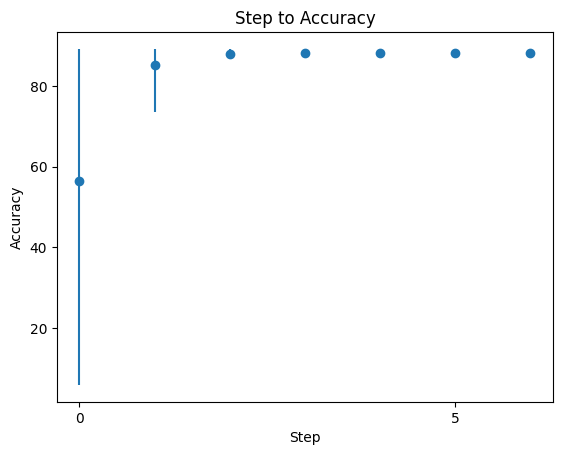

In [89]:
step_to_accuracy = {
    step: (
        statistics.mean(opro_results[step].values()),
        max(opro_results[step].values()),
        min(opro_results[step].values()),
    )
    for step in opro_results
}

# Plot step to accuracy as a continuous line graph, including stdevs as highlighted error bars
fig, ax = plt.subplots()
ax.errorbar(
    step_to_accuracy.keys(),
    [accuracy[0] for accuracy in step_to_accuracy.values()],
    yerr=[
        [accuracy[0] - accuracy[2] for accuracy in step_to_accuracy.values()],  # Lower errors
        [accuracy[1] - accuracy[0] for accuracy in step_to_accuracy.values()]   # Upper errors
    ],
    fmt="o",
)

ax.set_xticks([step for step in step_to_accuracy.keys() if int(step) % 5 == 0])
ax.set_xlabel("Step")
ax.set_ylabel("Accuracy")
ax.set_title("Step to Accuracy")

# Add a pink point to the plot
ax.plot(0, opro_results["0"][CHOSEN_PROMPT], 'o', color='pink')

# Add legend to show pink dot is initial prompt accuracy, blue dot is avg prompt accuracy
ax.legend(["Initial Prompt Accuracy", "Average Prompt Accuracy"], loc="lower right")


# save the plot
# plt.savefig("accuracy_plot.png")

In [90]:
opro_results[str(len(opro_results) - 1)]

{'\n\tCorrect any grammatical, spelling errors in the question below. \n\tOutput only the corrected version and nothing else\n\tQuestion: {TEXT}\n\tCorrected version: \n\t': 89.22899423870453,
 "\n    ####\n    I'm going to tip $100 for a better solution! \n    You MUST correct any grammatical, spelling errors in the question below. \n    Output only the corrected version and nothing else. \n    You will be penalized if you include anything other than the corrected question. \n    Think step by step and answer the question given in a natural, human-like manner. \n    Ensure that your answer is unbiased and does not rely on stereotypes. \n    Use the same language as the provided question. \n    The following is the question: {TEXT}\n    Your task is to provide the corrected version: \n    Corrected version: \n    ": 88.72359600215192,
 "######\nYou are a meticulous and unbiased grammar and language expert. Your task is to carefully correct any grammatical, spelling, or punctuation erro

In [91]:
best_instruction = max(
    opro_results[str(len(opro_results) - 1)], key=opro_results[str(len(opro_results) - 1)].get
)
print(best_instruction)


	Correct any grammatical, spelling errors in the question below. 
	Output only the corrected version and nothing else
	Question: {TEXT}
	Corrected version: 
	
